In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

df = pd.read_csv("F:\my_own_projects\ADAPT READY TASK\complaints.csv")

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nishanth\AppData\Local\Temp\ipykernel_18224\1149540079.py:3: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv("F:\my_own_projects\ADAPT READY TASK\complaints.csv")
C:\Users\Nishanth\AppData\Local\Temp\ipykernel_18224\1149540079.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("F:\my_own_projects\ADAPT READY TASK\complaints.csv")


In [15]:
print(df.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [3]:
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
3,2024-02-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am disappointed to have received a credit re...,NaN,LEXISNEXIS,CA,94124,NaN,Consent provided,Web,2024-02-20,Closed with explanation,Yes,NaN,8379830
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435


In [14]:
df['Product'].unique()

array(['Credit reporting or other personal consumer reports',
       'Debt collection',
       'Money transfer, virtual currency, or money service',
       'Credit card', 'Checking or savings account', 'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Vehicle loan or lease', 'Prepaid card', 'Mortgage',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt or credit management', 'Credit card or prepaid card',
       'Payday loan, title loan, or personal loan', 'Money transfers',
       'Credit reporting', 'Bank account or service', 'Consumer Loan',
       'Payday loan', 'Other financial service', 'Virtual currency'],
      dtype=object)

['FL' 'IL' 'NC' 'CA' 'MI' 'NJ' 'VA' 'GA' 'MS' 'TX' 'NY' 'PA' 'TN' 'IN'
 'MD' 'LA' 'VI' 'AL' 'UT' 'DC' 'AZ' 'SC' 'DE' 'MA' 'OK' 'OH' 'PR' 'OR'
 'MO' 'KS' 'AR' 'NE' 'WA' 'KY' 'NH' 'RI' 'MN' 'HI' 'ID' nan 'WI' 'CO' 'CT'
 'IA' 'NV' 'SD' 'NM' 'ME' 'AK' 'ND' 'AP' 'WV' 'AE' 'WY' 'MT' 'VT'
 'UNITED STATES MINOR OUTLYING ISLANDS' 'GU' 'AS' 'FM' 'MP' 'AA' 'MH' 'PW']


C:\Users\Nishanth\AppData\Local\Temp\ipykernel_18224\4010208920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=state_count, palette='viridis')


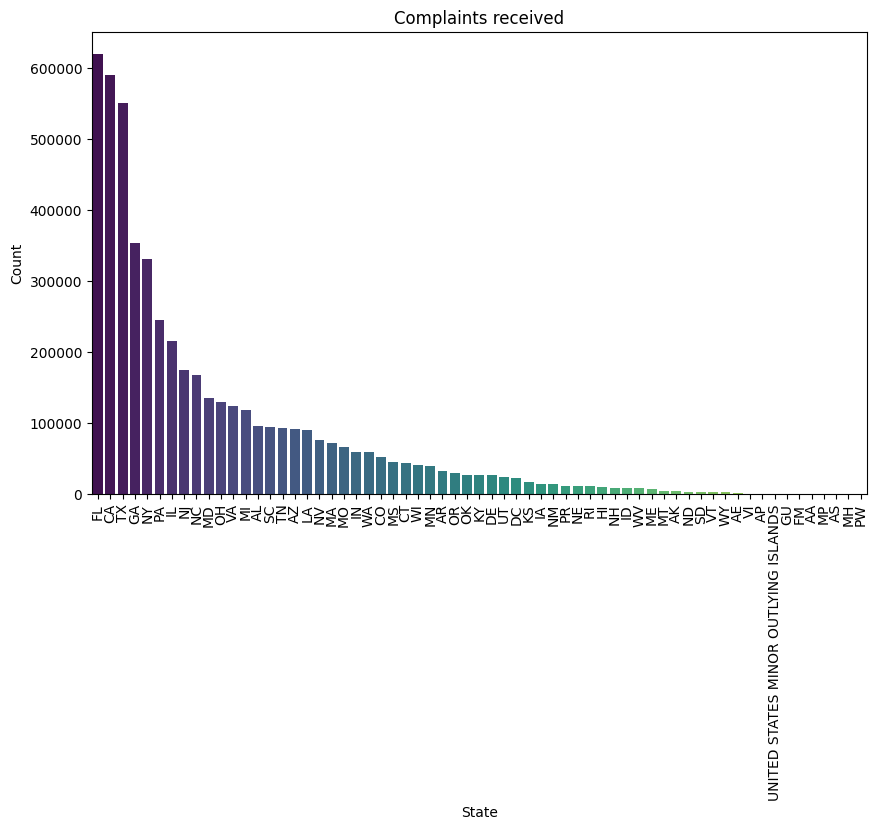

In [16]:
#statewise analysis:
print(df['State'].unique())
state_count = df['State'].value_counts().reset_index()
state_count.columns = ['State', 'Count']
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Count', data=state_count, palette='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Complaints received')
plt.show()

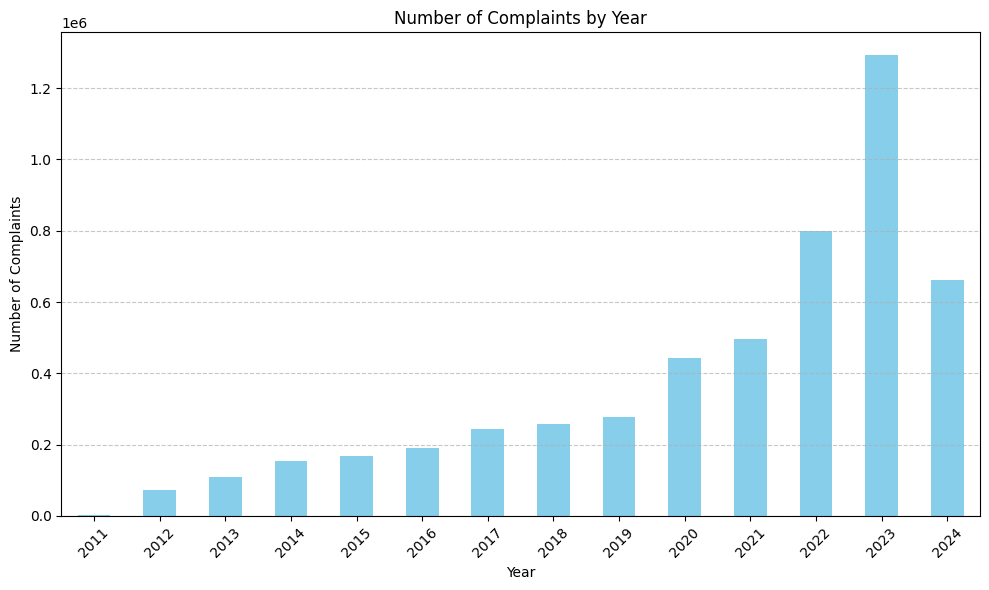

In [28]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year'] = df['Date received'].dt.year
complaints_by_year = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
complaints_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints by Year')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
df['Response Time'] = df['Date sent to company'] - df['Date received']
avg_response_time_by_state = df.groupby('State')['Response Time'].mean()
response_time_df = avg_response_time_by_state.reset_index()
print(response_time_df.sort_values(by='Response Time', ascending = True).head())

   State             Response Time
3     AL 0 days 18:51:41.613559322
24    LA 0 days 20:39:13.189246178
33    MS 0 days 21:54:12.097832571
46    PA 0 days 22:28:29.755629504
53    TX 0 days 23:54:08.675880355


In [47]:
top_issues_by_state = df.groupby(['State', 'Issue']).size().reset_index(name='Count')
top_issues_by_state = top_issues_by_state.loc[top_issues_by_state.groupby('State')['Count'].idxmax()]


top_issues_by_state['State'] = pd.Categorical(top_issues_by_state['State'], categories=top_issues_by_state['State'].unique(), ordered=True)
top_issues_by_state_sorted = top_issues_by_state.sort_values(by='State')

print(top_issues_by_state_sorted)

     State                                 Issue  Count
9       AA  Incorrect information on your report     10
65      AE           Improper use of your report    227
184     AK  Incorrect information on your report    907
326     AL  Incorrect information on your report  41989
455     AP  Incorrect information on your report     93
...    ...                                   ...    ...
7969    VT  Incorrect information on your report    374
8115    WA  Incorrect information on your report  10320
8277    WI  Incorrect information on your report   8351
8424    WV  Incorrect information on your report   1571
8553    WY           Improper use of your report    443

[63 rows x 3 columns]


In [52]:
print(df['Product'].value_counts())

product_counts = df['Product'].value_counts()

product_counts_df = pd.DataFrame(product_counts)
product_counts_df.columns = ['Count']

print(product_counts_df)

Product
Credit reporting, credit repair services, or other personal consumer reports    2163878
Credit reporting or other personal consumer reports                              959581
Debt collection                                                                  567007
Mortgage                                                                         397811
Checking or savings account                                                      212459
Credit card or prepaid card                                                      206373
Credit reporting                                                                 140429
Credit card                                                                      132976
Student loan                                                                      88116
Bank account or service                                                           86205
Money transfer, virtual currency, or money service                                68346
Vehicle loan or lease   

In [49]:
print(df['Issue'].value_counts())
print(df['Sub-issue'].value_counts())

Issue
Incorrect information on your report                                                1504940
Improper use of your report                                                          799797
Problem with a credit reporting company's investigation into an existing problem     589336
Attempts to collect debt not owed                                                    211699
Problem with a company's investigation into an existing problem                      204610
                                                                                     ...   
Lender damaged or destroyed vehicle                                                       8
Property was damaged or destroyed property                                                7
Lender sold the property                                                                  7
Lender damaged or destroyed property                                                      3
Lost or stolen refund                                                     

In [53]:
#Ease of complaint submission
print(df['Submitted via'].value_counts())

Submitted via
Web             4617033
Referral         248302
Phone            180479
Postal mail       94644
Fax               25658
Web Referral       1241
Email               425
Name: count, dtype: int64


In [62]:
print(df['Consumer disputed?'].value_counts())

Consumer disputed?
No     619938
Yes    148378
Name: count, dtype: int64


In [64]:
print(df['Company response to consumer'].value_counts())

Company response to consumer
Closed with explanation            3445821
Closed with non-monetary relief    1297585
In progress                         218783
Closed with monetary relief         153316
Closed without relief                17868
Closed                               17611
Untimely response                    11480
Closed with relief                    5304
Name: count, dtype: int64


In [65]:
df_with_consumer_disputes = (df[df['Consumer disputed?'] == 'Yes'])
consumer_disputes = df_with_consumer_disputes[['Company response to consumer', 'Consumer disputed?']]
print(consumer_disputes['Company response to consumer'].value_counts())

Company response to consumer
Closed with explanation            122695
Closed with non-monetary relief     11098
Closed with monetary relief          5439
Closed without relief                4811
Closed                               3625
Closed with relief                    708
Untimely response                       2
Name: count, dtype: int64


In [61]:
#Companies and their response
print(df['Company'].value_counts().head())

df_with_positive_response = (df[df['Timely response?'] == 'Yes'])
top_companies_responded = df_with_positive_response[['Company', 'Timely response?']]
print(top_companies_responded['Company'].value_counts())

Company
EQUIFAX, INC.                             1075067
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994517
Experian Information Solutions Inc.        904819
BANK OF AMERICA, NATIONAL ASSOCIATION      140335
WELLS FARGO & COMPANY                      128430
Name: count, dtype: int64
Company
EQUIFAX, INC.                             1073291
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994191
Experian Information Solutions Inc.        904767
BANK OF AMERICA, NATIONAL ASSOCIATION      136263
WELLS FARGO & COMPANY                      124621
                                           ...   
Loanatik, L.L.C.                                1
Signature Finance Company                       1
E & C Finace Company Inc                        1
THOMPSON KANE & COMPANY, LLC                    1
FHC Mortgage                                    1
Name: count, Length: 6624, dtype: int64


In [63]:
print(df['Company'].value_counts().head())
print (top_companies_responded['Company'].value_counts().head())



Company
EQUIFAX, INC.                             1075067
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994517
Experian Information Solutions Inc.        904819
BANK OF AMERICA, NATIONAL ASSOCIATION      140335
WELLS FARGO & COMPANY                      128430
Name: count, dtype: int64
Company
EQUIFAX, INC.                             1073291
TRANSUNION INTERMEDIATE HOLDINGS, INC.     994191
Experian Information Solutions Inc.        904767
BANK OF AMERICA, NATIONAL ASSOCIATION      136263
WELLS FARGO & COMPANY                      124621
Name: count, dtype: int64


In [18]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [66]:
print(df['Tags'].value_counts())

Tags
Servicemember                    284393
Older American                   159127
Older American, Servicemember     39330
Name: count, dtype: int64


In [ ]:
#Consumer consent provided - Consent is a crucial aspect to share the data and extract new insights
consent_percentage = (df['Consumer consent provided?'].count()/len(df)) * 100
print(f"Percentage of people whoe provided consent = {consent_percentage:.2f}")


Percentage of people whoe provided consent = 80.13


In [70]:
#Question 2:::::

a = list(map(int,input().split()))

temp = 1
start = 0
end = len(a)
result = []

try:
    for i in range(start, end):
        if a[i+1] > a[i]:
            temp+=1
        else:
            result.append(temp)
            temp = 1
            start = i+2
except:
    pass

print(max(result))

3


Output for the above code:
Input: 1 3 5 4 7
Output: 3

In [77]:
#Question 3::::

def Number():

    str_nums = input().split()


    def compare(a, b):
        ab = a + b
        ba = b + a
        for i in range(len(ab)):
            if ab[i] > ba[i]:
                return -1
            elif ab[i] < ba[i]:
                return 1
        return 0

    def custom_sort(nums):
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if compare(nums[i], nums[j]) > 0:
                    nums[i], nums[j] = nums[j], nums[i]
        return nums

    sorted_nums = custom_sort(str_nums)
    largest_num = ''.join(sorted_nums)

    
    if largest_num[0] == '0':
        largest_num = '0'

    return largest_num


print(Number())

210


In [83]:
#question 4::::

import pandas as pd

with open("F:\my_own_projects\ADAPT READY TASK\DT A1 sample_json (1) (1).json", 'r') as f:
    data = pd.read_json(f)

servlets = []
for servlet in data['web-app']['servlet']:
    servlets.append({
        'servlet-name': servlet['servlet-name'],
        'servlet-class': servlet['servlet-class']
    })

df_new = pd.DataFrame(servlets)


df_new.to_csv('servlets.csv', index=False)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nishanth\AppData\Local\Temp\ipykernel_18224\1647308034.py:5: SyntaxWarning: invalid escape sequence '\m'
  with open("F:\my_own_projects\ADAPT READY TASK\DT A1 sample_json (1) (1).json", 'r') as f:
